In [3]:
import numpy as np
from qiskit import *
from qiskit_aer import *
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [13]:
huh = '0100'
print(int(huh, 2))
print(np.binary_repr(3, width = 4))

4
0011


In [ ]:
def f(x):
    return x%5

In [ ]:
def oracle(q1, q2, f):
    qc = QuantumCircuit(q1.size() + q2.size())
    firstreg = ''
    for i in range(q1.size()):
        firstreg = str(q1.index(i)) + firstreg
    secondreg = ''
    for j in range(q2.size()):
        secondreg = str(q2.index(i)) + secondreg
    firstDec = int(firstreg, 2)
    secondDec = int(firstreg, 2)
    secondKet = binary_repr((secondDec + f(firstDec))%q2.size(), q2.size())
    for j in range(q2.size()):
        if q2.index(j) != secondKet[j]:
            qc.x(q1.size()+j -1)
    return qc.to_gate()

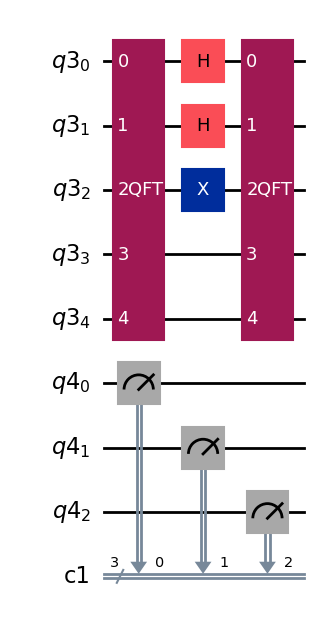

In [8]:
N = 5
W = 3

qr1 = QuantumRegister(N)
qr2 = QuantumRegister(W)
c = ClassicalRegister(W)
qc = QuantumCircuit(qr1, qr2, c)
qft = QFT(num_qubits=N, approximation_degree=0).to_gate()
# invqft = QFT(num_qubits=5, approximation_degree=0, inverse=True).to_gate()
qc.append(qft, qargs=range(0,N))
uf = oracle()
# qc.append(oracle, range(0,8))
qc.h(0)
qc.h(1)
qc.x(2)
qc.append(qft, qargs=range(0,N))
qc.measure(range(N,N+W), range(0,W))
qc.draw('mpl')